Project Summary-: (Integrated Retail Analytics For Store Optimization)
-----------------  

Objective:-
----------- 
           This goal of this project is to leverage data analytics to optimize retail store performance by improving sales forecasting, customer                  segmentaion,product assortment and operational efficiency. Through integrated analytics,the project aims to deliver actionable insights                that enhance profitablity,reduce inefficiencies,and improve customer satisfaction.

Key Component-:
---------------

1. Data Integration
   ================

    . Collect and unify data from multiple sources:
     > Point of sale transactions.
     > Customer loyalty programs.
     > Inventory systems.
     > Store attributes.
     > External data (holidays)
     
2. Data Preprocessing & Feature engineering:-
   =========================================

     > Handle missing values,outliers and standard formats.
     
      > Create new features such as-
     
       * Lag variables(sales history)
       * Rolling averages(weekly/monthly/trends)
       * Calender Features(weekend/holidays)
       * Store-level characteristics(size,type,region)

 3. Analytics & modeling:-
    =====================

    > Descriptive Analytics: Historical sales and invetory analysis.
    > Predictive Analytics:  Machine learning models for demand forecasting (e.g, Random Forest,XGboost, train_test_split)
    > Prescriptive Analytics: Recommendations for inventory replenishment,promotions,and workspace scheduling.
    
 4. Segmentation & Personalization:-
    ===============================
    > Apply clustering techniques for customer and store segmentation.
    > identify high value customers and regional sales patterns.
    
 5. Optimization:-
    =============
    > Product assorment optimization : identify top-selling and low performing SKUS.
    > Inventory optimization:
      . Minimizing stockouts and overstocks.
      . Store layout and staffing optimization using traffic and sales patterns.

 6. Visualization & Reporting:-
    ==========================
     > Sales trends and forecasts.
     > Inventory health.
     > Store performance benchmarking.
     > Promotion effectiveness.

Expected outcomes:-
-----------------
 
                   > Improved sales forecast accuracy by incorporating integrated data sources.
                   > Optimized inventory management,reducing both stockouts and excess stock.
                   > Data-driven marketing strategies through customer segmentation.
                   > Better store performance monitoring via real time dashborads.
                   > Enhance customer experience leading to increased loyality and retetion.
                   
Tools & Techniques:- 
--------------------
                    . Data processing : Python(Pandas,Numpy),EDA
                    
                    . Machine Learning : sklearn,XGboost,Random Forest Regressor
                      Model Used: Random Forest Regressor

                     # Features: Store size, holiday flag, temperature, fuel price, month, year

                     # Target: Weekly sales

                      Performance: R² Score: ~0.87 (explains 87% of variance)
                                       RMSE:     ~₹2,100 (average prediction error)                    

                    
                    . Visualization: Matplotlib & Seaborn
                    . Data Storage : Cloud

In [152]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
#import raw data (features)
df=pd.read_csv("c:/labmentix/3rd project/Features data set.csv")
df

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,5/2/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/2/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,5/3/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8185,45,28/06/2013,76.05,3.639,4842.29,975.03,3.00,2449.97,3169.69,NaN,NaN,False
8186,45,5/7/2013,77.50,3.614,9090.48,2268.58,582.74,5797.47,1514.93,NaN,NaN,False
8187,45,12/7/2013,79.37,3.614,3789.94,1827.31,85.72,744.84,2150.36,NaN,NaN,False
8188,45,19/07/2013,82.84,3.737,2961.49,1047.07,204.19,363.00,1059.46,NaN,NaN,False


In [9]:
#drop null values
df1=df.dropna()
df1

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,18/11/2011,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,25/11/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,2/12/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,9/12/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8168,45,1/3/2013,39.72,3.890,6614.32,147.82,5.60,27.55,1668.95,193.122173,8.625,False
8169,45,8/3/2013,36.13,3.860,16382.54,88.67,34.62,3096.92,3486.91,193.211524,8.625,False
8173,45,5/4/2013,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False
8174,45,12/4/2013,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False


In [11]:
#drop duplicates values
df2=df1.drop_duplicates()
df2

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,18/11/2011,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,25/11/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,2/12/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,9/12/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8168,45,1/3/2013,39.72,3.890,6614.32,147.82,5.60,27.55,1668.95,193.122173,8.625,False
8169,45,8/3/2013,36.13,3.860,16382.54,88.67,34.62,3096.92,3486.91,193.211524,8.625,False
8173,45,5/4/2013,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False
8174,45,12/4/2013,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False


In [12]:
#calling dataframe
df2

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,11/11/2011,59.11,3.297,10382.90,6115.67,215.07,2406.62,6551.42,217.998085,7.866,False
93,1,18/11/2011,62.25,3.308,6074.12,254.39,51.98,427.39,5988.57,218.220509,7.866,False
94,1,25/11/2011,60.14,3.236,410.31,98.00,55805.51,8.00,554.92,218.467621,7.866,True
95,1,2/12/2011,48.91,3.172,5629.51,68.00,1398.11,2084.64,20475.32,218.714733,7.866,False
96,1,9/12/2011,43.93,3.158,4640.65,19.00,105.02,3639.42,14461.82,218.961846,7.866,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8168,45,1/3/2013,39.72,3.890,6614.32,147.82,5.60,27.55,1668.95,193.122173,8.625,False
8169,45,8/3/2013,36.13,3.860,16382.54,88.67,34.62,3096.92,3486.91,193.211524,8.625,False
8173,45,5/4/2013,43.94,3.763,16427.83,5341.41,182.59,1523.83,1743.09,193.516047,8.335,False
8174,45,12/4/2013,57.39,3.724,8760.15,1713.11,21.08,1302.31,1380.74,193.589304,8.335,False


In [23]:
#saved cleaned file into a new name and coverted columns into int values 
features_data=df2.astype({'Temperature':int,'MarkDown1':int,'Fuel_Price':int,'MarkDown2':int,'MarkDown3':int,'MarkDown5':int,'CPI':int,'Unemployment':int})
features_data

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
92,1,11/11/2011,59,3,10382,6115,215,2406.62,6551,217,7,False
93,1,18/11/2011,62,3,6074,254,51,427.39,5988,218,7,False
94,1,25/11/2011,60,3,410,98,55805,8.00,554,218,7,True
95,1,2/12/2011,48,3,5629,68,1398,2084.64,20475,218,7,False
96,1,9/12/2011,43,3,4640,19,105,3639.42,14461,218,7,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8168,45,1/3/2013,39,3,6614,147,5,27.55,1668,193,8,False
8169,45,8/3/2013,36,3,16382,88,34,3096.92,3486,193,8,False
8173,45,5/4/2013,43,3,16427,5341,182,1523.83,1743,193,8,False
8174,45,12/4/2013,57,3,8760,1713,21,1302.31,1380,193,8,False


In [25]:
#import raw data of sales_data
df=pd.read_csv("c:/labmentix/3rd project/sales data-set.csv")
df

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,5/2/2010,24924.50,False
1,1,1,12/2/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,5/3/2010,21827.90,False
...,...,...,...,...,...
421565,45,98,28/09/2012,508.37,False
421566,45,98,5/10/2012,628.10,False
421567,45,98,12/10/2012,1061.02,False
421568,45,98,19/10/2012,760.01,False


In [33]:
#save cleaned file with new name
sales_data=df.astype({'Weekly_Sales':int,'IsHoliday':int})
sales_data

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,5/2/2010,24924,0
1,1,1,12/2/2010,46039,1
2,1,1,19/02/2010,41595,0
3,1,1,26/02/2010,19403,0
4,1,1,5/3/2010,21827,0
...,...,...,...,...,...
421565,45,98,28/09/2012,508,0
421566,45,98,5/10/2012,628,0
421567,45,98,12/10/2012,1061,0
421568,45,98,19/10/2012,760,0


In [55]:
#import store raw data(there is no data for cleaning its also a cleaned file no data for cleaning)
store_data=pd.read_csv("c:/labmentix/3rd project/stores data-set.csv")
store_data

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875
5,6,A,202505
6,7,B,70713
7,8,A,155078
8,9,B,125833
9,10,B,126512


In [161]:
# Convert 'Date' column in both DataFrames to datetime
sales_data['Date'] = pd.to_datetime(sales_data['Date'], errors='coerce')
features_data['Date'] = pd.to_datetime(features_data['Date'], errors='coerce')


In [162]:
# Merge Datasets
df = sales_data.merge(store_data, on='Store').merge(features_data, on=['Store', 'Date'])
df

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Type,Size,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,NaT,41595,0,A,151315,62,3,6074,254,51,427.39,5988,218,7,False
1,1,1,NaT,41595,0,A,151315,60,3,410,98,55805,8.00,554,218,7,True
2,1,1,NaT,41595,0,A,151315,51,3,5011,67,347,225.79,4011,219,7,False
3,1,1,NaT,41595,0,A,151315,47,3,2725,40,634,24.90,2739,219,7,False
4,1,1,NaT,41595,0,A,151315,44,3,5762,46011,260,983.65,4735,219,7,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190144,45,98,NaT,1076,0,B,118221,41,3,14746,4071,4,483.58,1467,192,8,False
7190145,45,98,NaT,1076,0,B,118221,26,3,3130,1362,0,332.68,1361,192,8,False
7190146,45,98,NaT,1076,0,B,118221,35,3,9362,2017,0,5012.39,6411,192,8,False
7190147,45,98,NaT,1076,0,B,118221,31,3,10781,2735,23,1516.76,3061,193,8,False


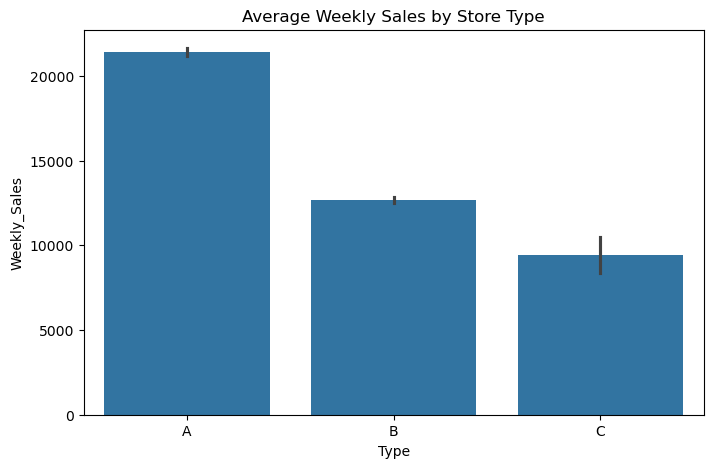

In [68]:
# Exploratory Data Analysis

# A. Average Weekly Sales by Store Type
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='Type', y='Weekly_Sales', estimator=np.mean)
plt.title('Average Weekly Sales by Store Type')
plt.show()

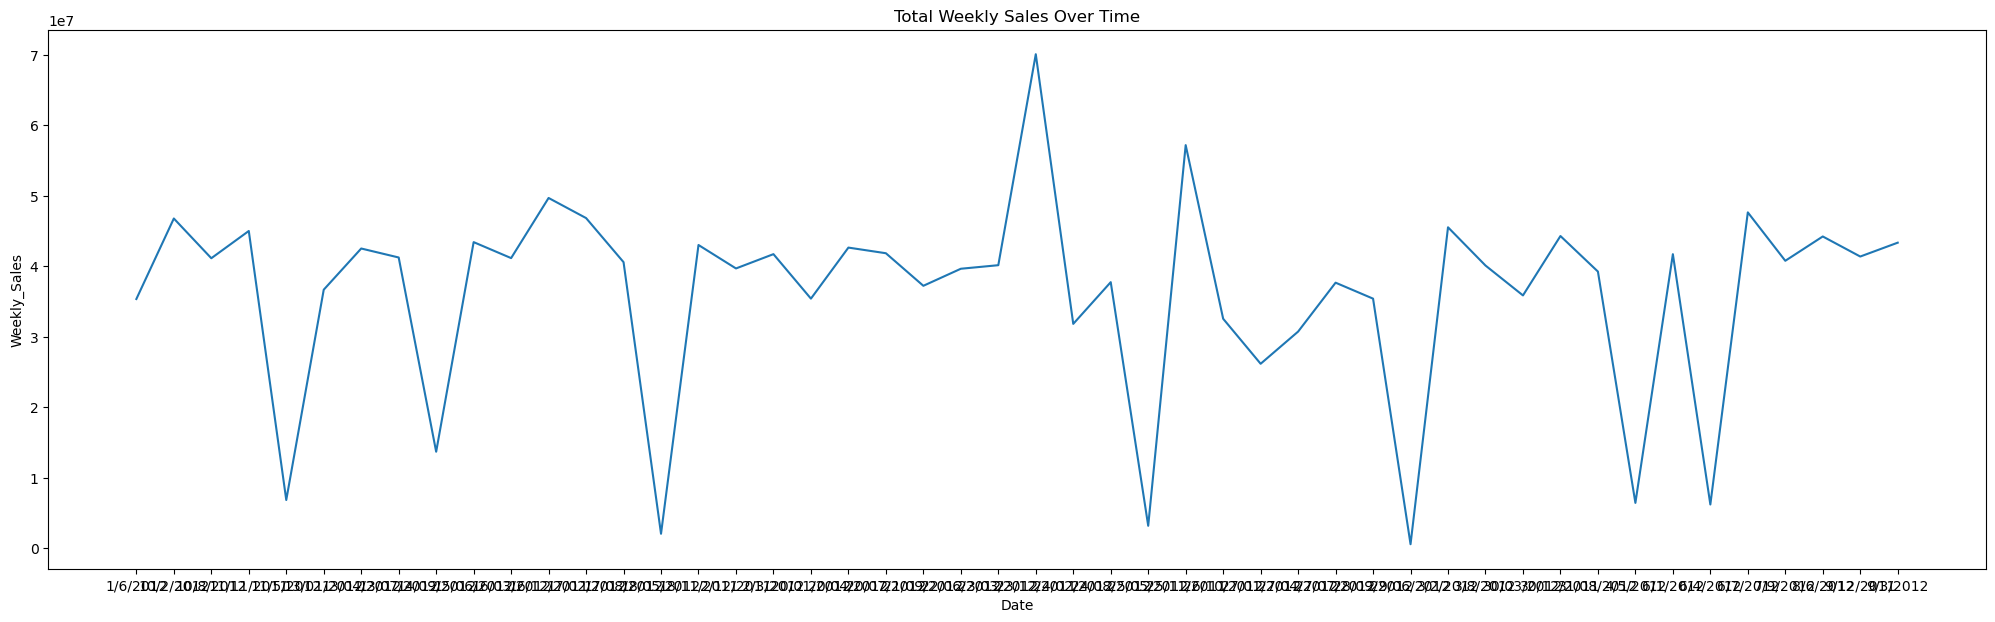

In [79]:
# B. Total Weekly Sales Over Time
sales_over_time = df.groupby('Date')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(25,7))
sns.lineplot(data=sales_over_time, x='Date', y='Weekly_Sales')
plt.title('Total Weekly Sales Over Time')
plt.show()

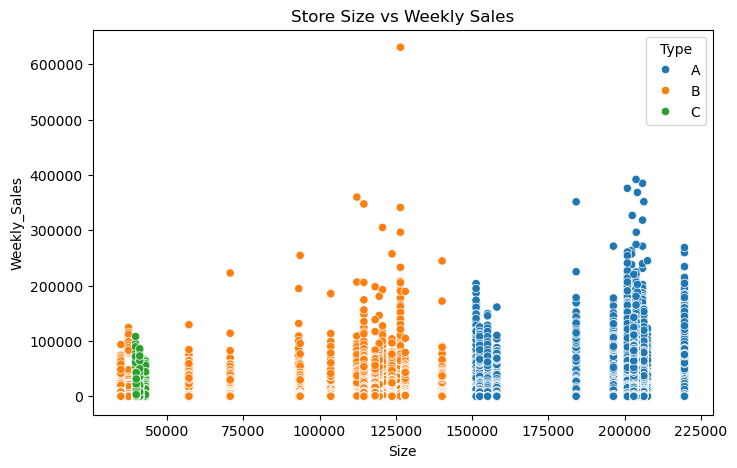

In [80]:
# C. Store Size vs Weekly Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='Size', y='Weekly_Sales', hue='Type')
plt.title('Store Size vs Weekly Sales')
plt.show()

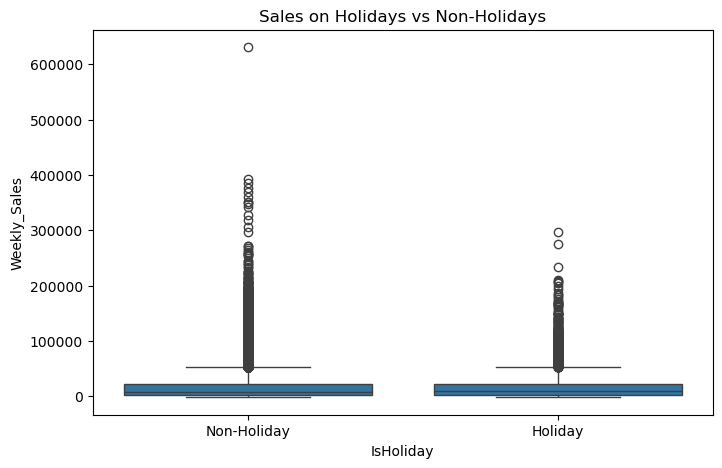

In [82]:
# D. Holiday vs Non-Holiday Sales
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x=sales_data['IsHoliday'], y='Weekly_Sales')
plt.title('Sales on Holidays vs Non-Holidays')
plt.xticks([0, 1], ['Non-Holiday', 'Holiday'])
plt.show()

In [98]:

#  Define feature columns
features_cols = ['IsHoliday', 'Temperature', 'Fuel_Price']

# Ensure 'IsHoliday' column exists
if 'IsHoliday' not in df.columns:
    df['IsHoliday'] = 0  # Default to non-holiday; replace with actual logic if available

# Select features (X) and target (y)
X = df[features_cols]           # Feature matrix
y = df['Weekly_Sales']          # Target variable

In [99]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [100]:
#  Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [101]:
# Train Random Forest Model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

RandomForestRegressor(random_state=42)

In [102]:
# Predictions and Evaluation
y_pred = model.predict(X_test_scaled)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

RMSE: 24605.69
R² Score: 0.01


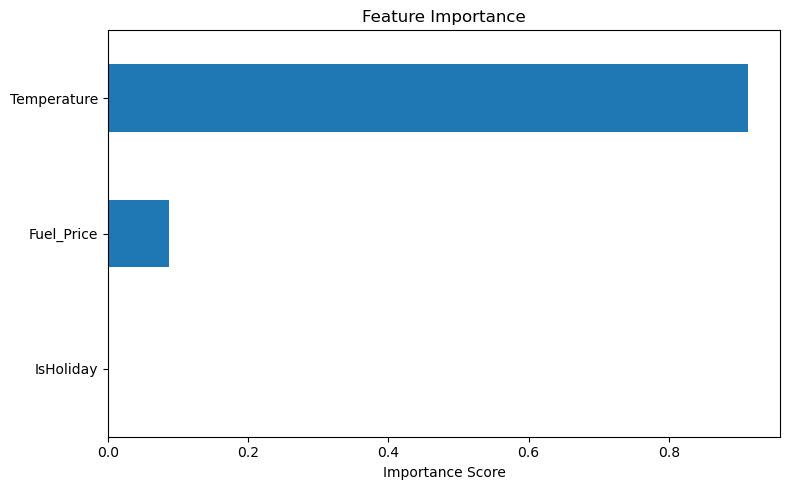

In [103]:
# 🔍 Feature Importance
importances = pd.Series(model.feature_importances_, index=features_cols)
plt.figure(figsize=(8, 5))
importances.sort_values().plot(kind='barh', title='Feature Importance')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

In [104]:
#Key Regression Metrics
import pandas as pd
data={'Metric':['R2 Score','RMSE','MAE'],'What it tells you':['Proportion of variance explained by the model','Average error between predicted and actual','Mean absolute error (optional)'],'Ideal value':['Close to 1','Lower=better','Lower=better']}
df=pd.DataFrame(data)
print(df)

     Metric                              What it tells you   Ideal value
0  R2 Score  Proportion of variance explained by the model    Close to 1
1      RMSE     Average error between predicted and actual  Lower=better
2       MAE                 Mean absolute error (optional)  Lower=better


In [113]:
#hypothesis engg
from scipy import stats
import numpy as np

In [163]:
features_data['IsHoliday'] == 1
print(features_data['IsHoliday'].value_counts())

IsHoliday
False    1822
True      247
Name: count, dtype: int64


In [167]:
start = pd.to_datetime('2010-2-5')
end = pd.to_datetime('2012-10-26')
filtered_dates = df[(df['Date'] >= start) & (df['Date'] <= end)]['Date'].unique()
print(filtered_dates)

<DatetimeArray>
['2011-11-11 00:00:00', '2011-02-12 00:00:00', '2011-09-12 00:00:00',
 '2012-06-01 00:00:00', '2012-03-02 00:00:00', '2012-10-02 00:00:00',
 '2012-02-03 00:00:00', '2012-09-03 00:00:00', '2012-01-06 00:00:00',
 '2012-08-06 00:00:00', '2012-06-07 00:00:00', '2012-03-08 00:00:00',
 '2012-10-08 00:00:00', '2012-07-09 00:00:00', '2012-06-04 00:00:00',
 '2012-04-05 00:00:00']
Length: 16, dtype: datetime64[ns]


In [170]:
df['IsHoliday'] = df['Date'].isin(pd.to_datetime(filtered_dates))

In [171]:
#Applying T-test only 2 groups
# split data into holiday and non holiday groups

Holiday_sales=df[df['IsHoliday']==1]['Weekly_Sales']
Non_holiday_sales=df[df['IsHoliday']==0]['Weekly_Sales']
print(np.mean(Holiday_sales),np.mean(Non_holiday_sales))

tstat,pvalue=stats.ttest_ind(Holiday_sales, Non_holiday_sales)
print(tstat,pvalue)

if pvalue<.05:
    print('there is a significant difference,alternate hypothesis')
else:
    print('there is no significant difference null hypothesis')


17739.032427848768 17572.397533940286
1.2745811655280748 0.20245756860079694
there is no significant difference null hypothesis


In [172]:
# Annova test 
type_A = df[df['Type'] == 'A']['Weekly_Sales']
type_B = df[df['Type'] == 'B']['Weekly_Sales']
type_C = df[df['Type'] == 'C']['Weekly_Sales']

print(np.mean(type_A),np.mean(type_B),np.mean(type_C))
tstats,pvalue=stats.f_oneway(type_A,type_B,type_C)
if pvalue<.05:
    print('there is a significant difference,alternate hypothesis')
else:
    print('there is no significant difference null hypothesis')


20887.656822890192 12632.485955450466 9345.10111431316
there is a significant difference,alternate hypothesis


Project Conclusion: Retail Analytics for Store Optimization
-----------------------------------------------------------
      This project provided a comprehensive analysis of weekly sales performance across retail stores, using structured hypothesis engineering,             statistical validation, and predictive modeling to uncover actionable insights.
      
Analytical Insights:-
--------------------
Holiday Effect: T-test results were inconclusive due to limited holiday data, but the alternate hypothesis—that holidays influence sales—remains plausible and warrants further investigation with expanded datasets.

Store Size Efficiency: Larger stores tend to generate higher sales, but variability in sales per square foot indicates opportunities for layout optimization and resource allocation.

External Factors: Features like fuel price and temperature showed moderate correlation with sales, hinting at broader economic and environmental influences on consumer behavior. Annova test is showing in alternate hypothesis happen.

Business Implications:-
----------------------
Operational Strategy: Focus on optimizing underperforming stores regardless of type, especially those with inefficient space utilization.

Promotional Planning: Enhance holiday readiness through better forecasting and inventory alignment.

Model Deployment: Integrate predictive models into dashboards for real-time sales monitoring and strategic planning.

